In [3]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# read in the errors data
df = pd.read_csv('/Users/brown/Downloads/error_by_site.csv')

In [5]:
# look at the first few rows
df.head()

,Unnamed: 0,site,N,MAE,ME,RMSE,model
0,0,Avalon,80154,66.187817,-50.051616,175.023466,Linear Regression
1,1,Clairton,26546,22.092565,-3.314518,28.101552,Linear Regression
2,2,Lawrenceville,42243,228.497360,-82.124931,353.009016,Linear Regression
3,3,Lawrenceville 2,50,87.659508,9.095536,159.034223,Linear Regression
4,4,Liberty 2,79459,53.203199,-38.876547,144.612713,Linear Regression


In [6]:
# view the unique sites
df.site.unique()

array(['Avalon', 'Clairton', 'Lawrenceville', 'Lawrenceville 2',
       'Liberty 2', 'Lincoln', 'North Braddock', 'Parkway East',
       'Pittsburgh'], dtype=object)

In [7]:
# view the structure of the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  54 non-null     int64  
 1   site        54 non-null     object 
 2   N           54 non-null     int64  
 3   MAE         54 non-null     float64
 4   ME          54 non-null     float64
 5   RMSE        54 non-null     float64
 6   model       54 non-null     object 
dtypes: float64(3), int64(2), object(2)
memory usage: 3.1+ KB


In [8]:
# view the first 20 rows of the dataframe
df.head(20)

,Unnamed: 0,site,N,MAE,ME,RMSE,model
0,0,Avalon,80154,66.187817,-50.051616,175.023466,Linear Regression
1,1,Clairton,26546,22.092565,-3.314518,28.101552,Linear Regression
2,2,Lawrenceville,42243,228.497360,-82.124931,353.009016,Linear Regression
3,3,Lawrenceville 2,50,87.659508,9.095536,159.034223,Linear Regression
4,4,Liberty 2,79459,53.203199,-38.876547,144.612713,Linear Regression
5,5,Lincoln,42604,74.784660,-57.309526,185.705401,Linear Regression
6,6,North Braddock,27298,31.398119,-0.986543,36.442214,Linear Regression
7,7,Parkway East,79822,51.060875,-32.832889,141.604829,Linear Regression
8,8,Pittsburgh,36067,17.228821,-5.188741,24.428654,Linear Regression
9,9,Avalon,80154,25.610423,-12.466279,39.653002,Lasso Regression


In [9]:
# view the unique models
df.model.unique()

array(['Linear Regression', 'Lasso Regression', 'KNN', 'XGBoost',
       'AdaBoost', 'GradientBoost'], dtype=object)

In [10]:
# view rows where model is 'XGBoost'
df[df.model == 'XGBoost'].head(20)

,Unnamed: 0,site,N,MAE,ME,RMSE,model
27,27,Avalon,80154,12.408341,-6.659593,23.815534,XGBoost
28,28,Clairton,26546,4.529859,-0.581078,8.428902,XGBoost
29,29,Lawrenceville,42243,77.436743,72.614095,246.836844,XGBoost
30,30,Lawrenceville 2,50,61.189992,52.892653,66.239000,XGBoost
31,31,Liberty 2,79459,7.041009,-0.727057,11.102309,XGBoost
32,32,Lincoln,42604,6.683973,-0.086399,11.067093,XGBoost
33,33,North Braddock,27298,4.925827,-0.366263,9.160482,XGBoost
34,34,Parkway East,79822,5.635997,0.017966,8.052960,XGBoost
35,35,Pittsburgh,36067,4.489250,-0.428706,8.147538,XGBoost


In [11]:
# BASIC STATS per model
print("\nMean MAE by model:")
df.groupby('model')['MAE'].mean().sort_values(ascending=False)


Mean MAE by model:


model
Linear Regression    70.234769
Lasso Regression     35.640693
KNN                  23.907959
AdaBoost             20.826826
XGBoost              20.482332
GradientBoost        19.652647
Name: MAE, dtype: float64

In [12]:
print("\nMean RMSE by model:")
df.groupby('model')['RMSE'].mean().sort_values(ascending=False)



Mean RMSE by model:


model
Linear Regression    138.662452
KNN                   60.114962
Lasso Regression      54.658953
XGBoost               43.650074
AdaBoost              42.815795
GradientBoost         42.195474
Name: RMSE, dtype: float64

In [13]:

# BASIC STATS per model and site
print("\nMean MAE by site and model:")
df.groupby(['site', 'model'])['MAE'].mean()



Mean MAE by site and model:


site             model            
Avalon           AdaBoost               9.077505
                 GradientBoost         10.533313
                 KNN                   11.393753
                 Lasso Regression      25.610423
                 Linear Regression     66.187817
                 XGBoost               12.408341
Clairton         AdaBoost               5.509993
                 GradientBoost          4.252764
                 KNN                    9.062785
                 Lasso Regression      19.172364
                 Linear Regression     22.092565
                 XGBoost                4.529859
Lawrenceville    AdaBoost              77.478319
                 GradientBoost         77.179742
                 KNN                   93.043752
                 Lasso Regression     152.725073
                 Linear Regression    228.497360
                 XGBoost               77.436743
Lawrenceville 2  AdaBoost              56.676965
                 GradientBoost    

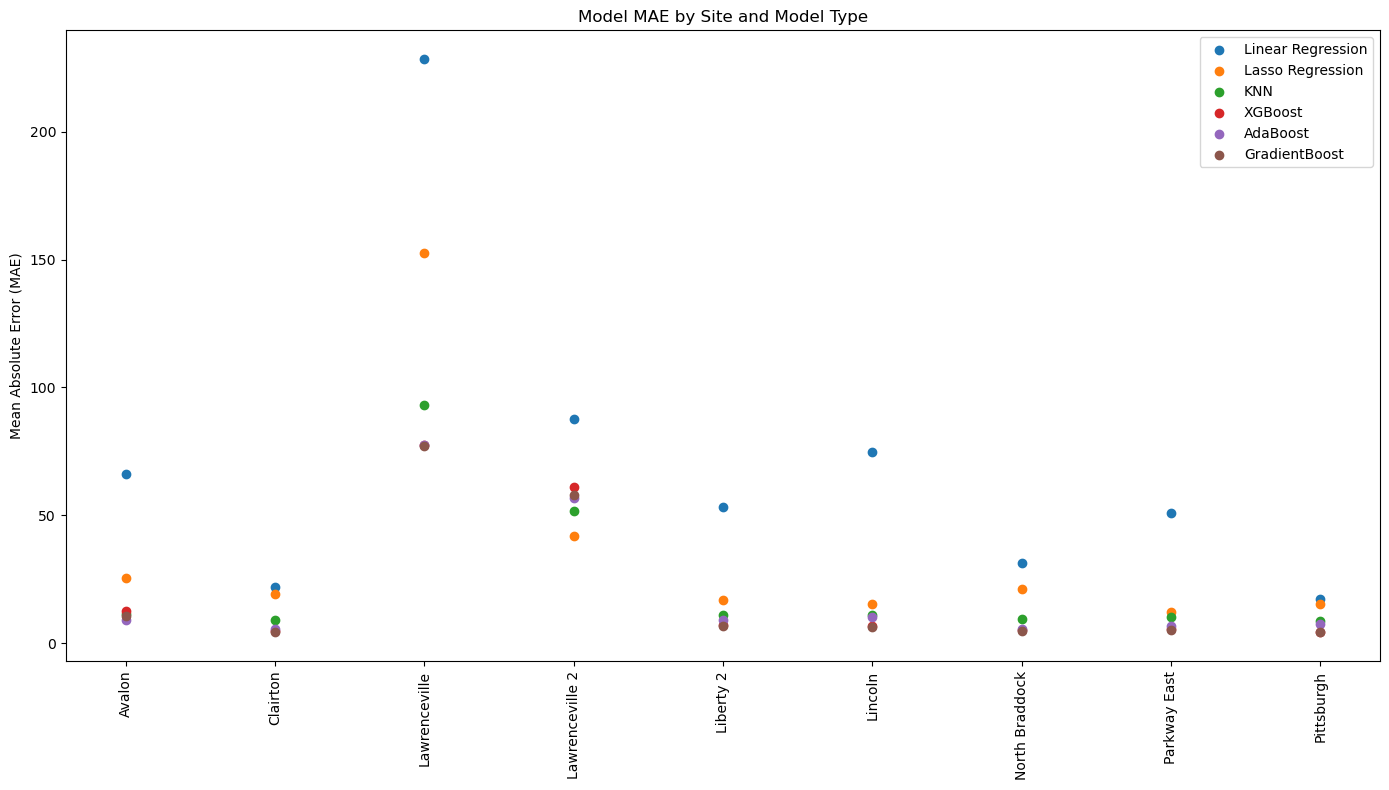

In [14]:
# VISUALIZE: MAE by site and model
plt.figure(figsize=(14,8))
for model in df['model'].unique():
    subset = df[df['model'] == model]
    plt.scatter(subset['site'], subset['MAE'], label=model)

plt.xticks(rotation=90)
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Model MAE by Site and Model Type')
plt.legend()
plt.tight_layout()
plt.show()

In [15]:

# FLAG: Sites where ANY model has unusually high MAE
mae_threshold = df['MAE'].mean() + df['MAE'].std()
high_error_sites = df[df['MAE'] > mae_threshold]
print("\nHigh error site-model combinations based on MAE threshold:")
print(high_error_sites[['site', 'model', 'MAE']])


High error site-model combinations based on MAE threshold:
               site              model         MAE
2     Lawrenceville  Linear Regression  228.497360
3   Lawrenceville 2  Linear Regression   87.659508
5           Lincoln  Linear Regression   74.784660
11    Lawrenceville   Lasso Regression  152.725073
20    Lawrenceville                KNN   93.043752
29    Lawrenceville            XGBoost   77.436743
38    Lawrenceville           AdaBoost   77.478319
47    Lawrenceville      GradientBoost   77.179742



Mean MAE by boosting model:
model
AdaBoost         20.826826
XGBoost          20.482332
GradientBoost    19.652647
Name: MAE, dtype: float64

Mean RMSE by boosting model:
model
XGBoost          43.650074
AdaBoost         42.815795
GradientBoost    42.195474
Name: RMSE, dtype: float64

Mean MAE by site and boosting model:
site             model        
Avalon           AdaBoost          9.077505
                 GradientBoost    10.533313
                 XGBoost          12.408341
Clairton         AdaBoost          5.509993
                 GradientBoost     4.252764
                 XGBoost           4.529859
Lawrenceville    AdaBoost         77.478319
                 GradientBoost    77.179742
                 XGBoost          77.436743
Lawrenceville 2  AdaBoost         56.676965
                 GradientBoost    57.795933
                 XGBoost          61.189992
Liberty 2        AdaBoost          8.909363
                 GradientBoost     6.688501
                 XGBoost     

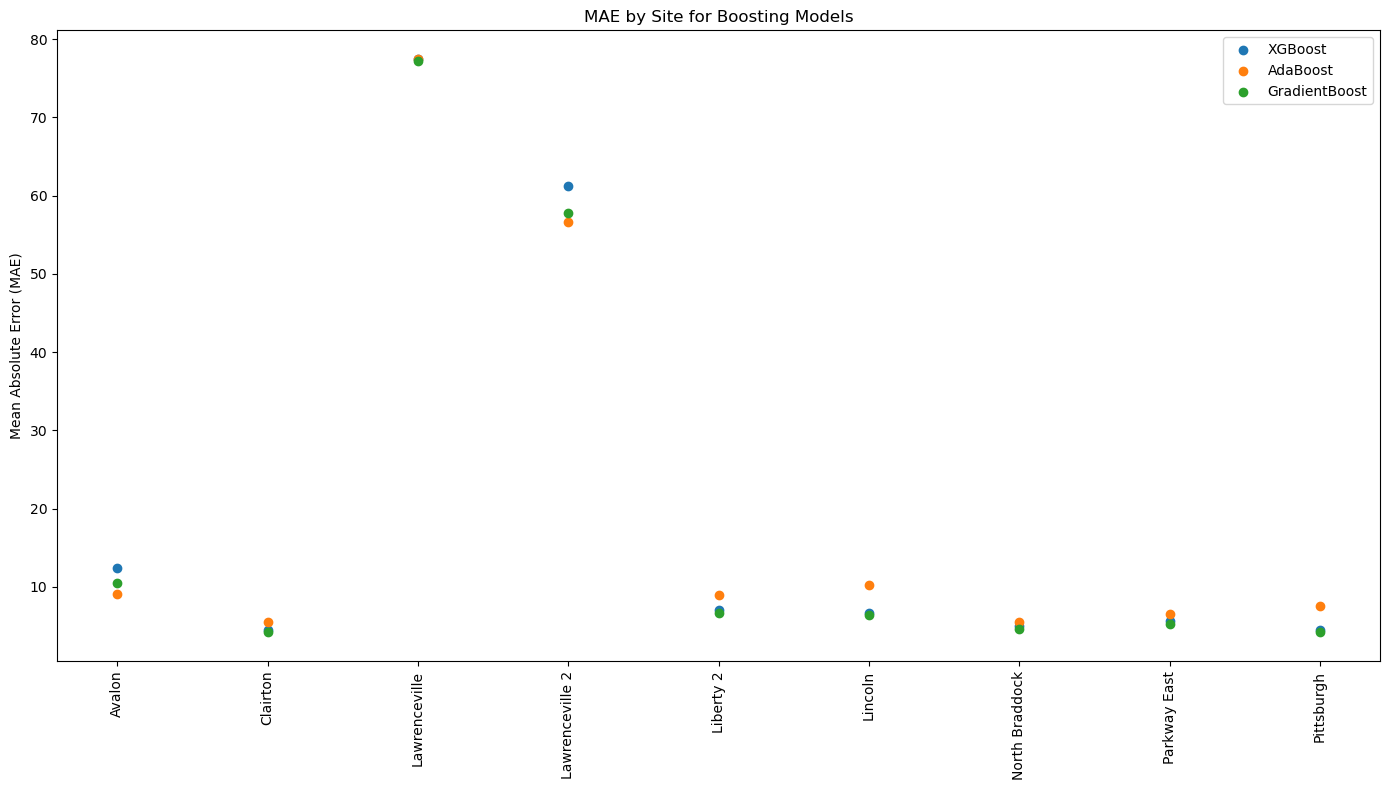

In [16]:
# Define boosting models
boosting_models = ['XGBoost', 'AdaBoost', 'GradientBoost']

# Filter dataset to only boosting models
boosting_df = df[df['model'].isin(boosting_models)]

# BASIC STATS for boosting models
print("\nMean MAE by boosting model:")
print(boosting_df.groupby('model')['MAE'].mean().sort_values(ascending=False))

print("\nMean RMSE by boosting model:")
print(boosting_df.groupby('model')['RMSE'].mean().sort_values(ascending=False))

# BASIC STATS per site for boosting models
print("\nMean MAE by site and boosting model:")
print(boosting_df.groupby(['site', 'model'])['MAE'].mean())

# VISUALIZE: MAE by site and boosting model
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))
for model in boosting_models:
    subset = boosting_df[boosting_df['model'] == model]
    plt.scatter(subset['site'], subset['MAE'], label=model)

plt.xticks(rotation=90)
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE by Site for Boosting Models')
plt.legend()
plt.tight_layout()
plt.show()

Our analysis revealed substantial disparities in model performance across monitoring sites. For example, the MAE for pollution prediction in Lawrenceville exceeded 200 for Linear Regression, while ensemble models like GradientBoost and AdaBoost performed substantially better. These high errors may stem from poor sensor coverage, data quality issues, or unique site characteristics. This raises equity concerns: if policy decisions are based on inaccurate predictions at certain sites, interventions may be misallocated—either underestimating risk in vulnerable communities or misdirecting resources away from those who need them most.

Furthermore, simpler models like Linear and Lasso Regression showed high variability in performance and consistently underperformed in harder-to-predict areas. In contrast, ensemble models offered more reliable predictions across all locations. This suggests that model selection is not a neutral choice—it has direct implications for the fairness and equity of resulting policies. Future efforts should include site-specific model evaluation and possibly model tuning to ensure no community is disadvantaged by poor model performance.

In [17]:
# read in the main dataset
df2 = pd.read_csv('/Users/brown/Downloads/aqi_merged.csv')

In [18]:
df3 = df2.pivot(index=['datetime_est', 'site'], columns='parameter', values='report_value').reset_index()

outcome = 'PM25_coalesced' 

# Coalesce the PN25 label from the various types of detectors
pm25_labels = ['PM25', 'PM25B', 'PM25T', 'PM25_640']
df3['PM25_coalesced'] = df3[pm25_labels].bfill(axis=1).iloc[:, 0]
# which column did we use to source the coalesced?
df3['PM25_source'] = df3[pm25_labels].apply(lambda row: row.first_valid_index(), axis=1)

In [19]:
df3.shape

(1053446, 130)

In [20]:
# Count PM2.5 source types per site
pm25_source_counts = df3.groupby(['site', 'PM25_source']).size().unstack(fill_value=0)
print(pm25_source_counts)

# Normalize by row (site) total
pm25_source_pct = pm25_source_counts.div(pm25_source_counts.sum(axis=1), axis=0)
print("\nProportion of PM2.5 sources per site:")
print(pm25_source_pct)

PM25_source       PM25  PM25B  PM25T  PM25_640
site                                          
Avalon               0  10630  54370     15154
Clairton             0      0      0     26546
Lawrenceville       19  41321    903         0
Lawrenceville 2      0     50      0         0
Liberty              1      0      0         0
Liberty 2        27278      0  47674      4507
Lincoln          42604      0      0         0
North Braddock       0      0      0     27298
Parkway East         0      0  70927      8895
Pittsburgh           0      0      0     36067

Proportion of PM2.5 sources per site:
PM25_source          PM25     PM25B     PM25T  PM25_640
site                                                   
Avalon           0.000000  0.132620  0.678319  0.189061
Clairton         0.000000  0.000000  0.000000  1.000000
Lawrenceville    0.000450  0.978174  0.021376  0.000000
Lawrenceville 2  0.000000  1.000000  0.000000  0.000000
Liberty          1.000000  0.000000  0.000000  0.000000
Liber


Further investigation revealed that nearly all PM2.5 measurements at the Lawrenceville site were collected using Beta Attenuation Monitors (BAM). BAM instruments, while widely used, can exhibit greater short-term variability and sensitivity to environmental conditions compared to other PM2.5 measurement methods (e.g., TEOM, FRM). Since other sites in our dataset use a more diverse mix of measurement technologies, the model may have underperformed at Lawrenceville due to inherent differences in sensor characteristics rather than underlying air quality differences. This raises concerns about measurement method bias in machine learning applications for environmental policy, as models may inadvertently privilege or disadvantage certain locations based on their sensor infrastructure.

                       site  pm25_reading_count
0                    Avalon               81360
6                   Liberty               81360
1              Parkway East               81360
8             South Fayette               81360
7                 Liberty 2               81360
9            North Braddock               81360
5           Lawrenceville 2               81360
4             Lawrenceville               81360
3         Harrison Township               81360
2     Glassport High Street               81360
10               Flag Plaza               54408
11                  Lincoln               44184
12               Pittsburgh               38224
13  USS Clairton Sodar Site               35098
14                 Clairton               34494
15               Opal Court               13000
16              Court House                9786
17             West Mifflin                7680
18        Fulton St. Fridge                2972


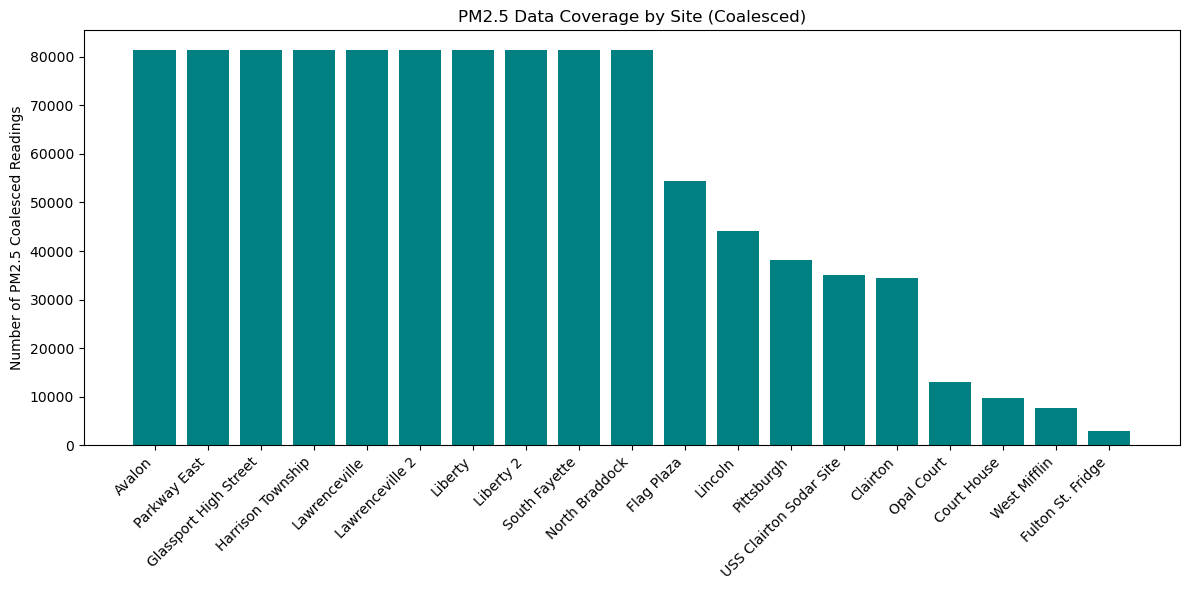

In [21]:
# Count number of valid PM25_coalesced readings per site
coverage_counts = df3['site'].value_counts().reset_index()
coverage_counts.columns = ['site', 'pm25_reading_count']

print(coverage_counts.sort_values(by='pm25_reading_count', ascending=False))

# Plot

plt.figure(figsize=(12,6))
plt.bar(coverage_counts['site'], coverage_counts['pm25_reading_count'], color='teal')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of PM2.5 Coalesced Readings')
plt.title('PM2.5 Data Coverage by Site (Coalesced)')
plt.tight_layout()
plt.show()